In [16]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np

In [22]:
# load image data s and reshape 
data = pd.read_pickle('images_df_numerical.pkl')
# convert to numpy array
(data_images, data_label) = (data['data'],data['Species'])
classes = [str(c) for c in data_label.unique()]
image_size = data_images[0].size
samples = data_images.size
image_shape = (216,334,3) # height, width , channel
# reshape every row to the image, swap rgbs and scale to 0-1
data_images = np.asarray([
    cv2.cvtColor(row.reshape(image_shape), cv2.COLOR_BGR2RGB).astype('float32')/255.
    for row in data_images])
data_images = data_images.reshape(data_images.shape[0], -1)
data_label = [row.astype('int32') for row in data_label]

Model Accuracy: 0.34


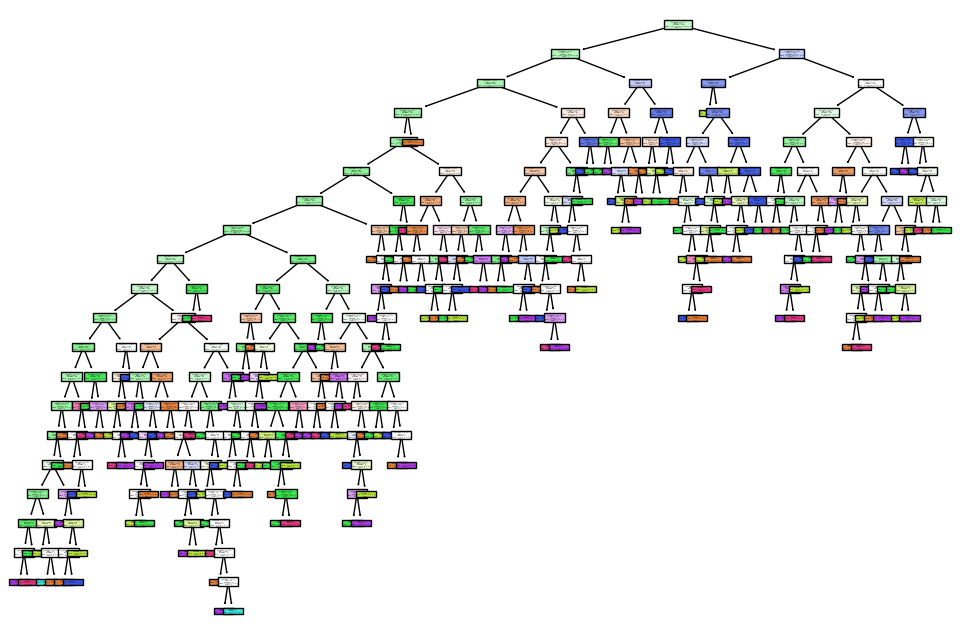

In [23]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_images, data_label, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, class_names=classes)
plt.show()
